In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = "../simulations/"

In [127]:
#r_list = ['0.0', '0.1', '1.0', '10.0', '100.0']
#r_list = np.logspace(-1,2,10)[:-1]
r_list = np.insert(np.logspace(-1,3,13), 0, 0.0)
print(r_list)
n_r = len(r_list)
n_samples = 100
x = np.arange(1, n_samples) / n_samples
x_fold = x[:n_samples//2]
pi_weight = 2*(x_fold)*(1 - x_fold)
print(pi_weight)

[  0.00000000e+00   1.00000000e-01   2.15443469e-01   4.64158883e-01
   1.00000000e+00   2.15443469e+00   4.64158883e+00   1.00000000e+01
   2.15443469e+01   4.64158883e+01   1.00000000e+02   2.15443469e+02
   4.64158883e+02   1.00000000e+03]
[ 0.0198  0.0392  0.0582  0.0768  0.095   0.1128  0.1302  0.1472  0.1638
  0.18    0.1958  0.2112  0.2262  0.2408  0.255   0.2688  0.2822  0.2952
  0.3078  0.32    0.3318  0.3432  0.3542  0.3648  0.375   0.3848  0.3942
  0.4032  0.4118  0.42    0.4278  0.4352  0.4422  0.4488  0.455   0.4608
  0.4662  0.4712  0.4758  0.48    0.4838  0.4872  0.4902  0.4928  0.495
  0.4968  0.4982  0.4992  0.4998  0.5   ]


In [4]:
sim = 'a-2.0'
mMAF = np.zeros((n_r, n_samples-1))
jMAF_triu = np.zeros((n_r, n_samples*(n_samples-1)//2))
for i, r in enumerate(r_list):
    fn = 'jsfs_{}_r-{}.txt'.format(sim, r)
    with open(data_dir + fn) as datafile:
        for line in datafile:
            if line.startswith('#'):
                continue
            else:
                mMAF[i,:] = np.array(line.split(), dtype=float)
                jMAF_triu[i,:] = np.array(datafile.readline().split())
                break
                
jMAF = np.zeros((n_r, n_samples-1, n_samples-1))
for i in range(n_r):
    jMAF[i,:,:][np.triu_indices(n_samples-1)] = jMAF_triu[i,:]
    jMAF[i,:,:][np.diag_indices(n_samples-1)] /= 2
jMAF += np.transpose(jMAF, axes=(0,2,1))

mMAF_fold = (mMAF + mMAF[:,::-1])[:,:n_samples//2]
mMAF_fold[:,-1] /= 2

jMAF_fold = (jMAF + jMAF[:,::-1,:] + jMAF[:,:,::-1])[:, :n_samples//2, :n_samples//2]
jMAF_fold[:,-1,:-1] /= 2
jMAF_fold[:,:-1,-1] /= 2
jMAF_fold[:,-1,-1] /= 3

mMAF_sq_fold = mMAF_fold[:,:,None] * mMAF_fold[:,None,:]
ratio_fold = jMAF_fold / mMAF_sq_fold

jMAF_kingman = jMAF_fold
mMAF_kingman = mMAF_fold
ratio_kingman = ratio_fold
pi_kingman = np.dot(mMAF_fold, pi_weight)


PMI_kingman = np.log2(ratio_fold)
wPMI_kingman = jMAF_kingman*PMI_kingman
diag_kingman = np.diagonal(wPMI_kingman, axis1=1, axis2=2)
offdiag_kingman = (np.sum(wPMI_kingman, axis=2) - diag_kingman)

# Independent sites

In [5]:
#mMAF = np.zeros(n_samples-1)
#jMAF_triu = np.zeros(n_samples*(n_samples-1)//2)
fn = 'jsfs_a-2.0_unlinked.txt'
with open(data_dir + fn) as datafile:
    for line in datafile:
        if line.startswith('#'):
            continue
        else:
            mMAF = np.array(line.split(), dtype=float)
            jMAF_triu = np.array(datafile.readline().split())
            break
                
jMAF = np.zeros((n_samples-1, n_samples-1))
jMAF[np.triu_indices(n_samples-1)] = jMAF_triu[:]
jMAF[np.diag_indices(n_samples-1)] /= 2
jMAF += np.transpose(jMAF)

mMAF_fold = (mMAF + mMAF[::-1])[:n_samples//2]
mMAF_fold[-1] /= 2

jMAF_fold = (jMAF + jMAF[::-1,:] + jMAF[:,::-1])[:n_samples//2, :n_samples//2]
jMAF_fold[-1,:-1] /= 2
jMAF_fold[:-1,-1] /= 2
jMAF_fold[-1,-1] /= 3


#mMAF_fold /= np.sum(mMAF_fold)
#jMAF_fold /= np.sum(jMAF_fold)

mMAF_sq_fold = mMAF_fold[:,None] * mMAF_fold[None,:]
ratio_fold = jMAF_fold / mMAF_sq_fold

jMAF_unlinked = jMAF_fold
mMAF_unlinked = mMAF_fold
ratio_unlinked = ratio_fold
cov_unlinked = jMAF_fold - mMAF_sq_fold

pi_unlinked = np.dot(mMAF_fold, pi_weight)
PMI_unlinked = np.log2(ratio_fold)
wPMI_unlinked = jMAF_unlinked*np.log2(ratio_fold)
diag_unlinked = np.diagonal(PMI_unlinked)
offdiag_unlinked = (np.sum(PMI_unlinked, axis=1) - diag_unlinked)# / (n_samples/2 - 1)

In [136]:
mMAF = np.zeros(n_samples-1)
jMAF_triu = np.zeros(n_samples*(n_samples-1)//2)
fn = 'jsfs_a-2.0_unlinked_rep-{}.txt'
nreps = 100
for rep in range(nreps):    
    with open(data_dir + fn.format(rep)) as datafile:
        for line in datafile:
            if line.startswith('#'):
                continue
            else:
                mMAF += np.array(line.split(), dtype=float)
                jMAF_triu += np.array(datafile.readline().split(), dtype=float)
                break
mMAF /= nreps
jMAF_triu /= nreps

jMAF = np.zeros((n_samples-1, n_samples-1))
jMAF[np.triu_indices(n_samples-1)] = jMAF_triu[:]
jMAF[np.diag_indices(n_samples-1)] /= 2
jMAF += np.transpose(jMAF)

mMAF_fold = (mMAF + mMAF[::-1])[:n_samples//2]
mMAF_fold[-1] /= 2

jMAF_fold = (jMAF + jMAF[::-1,:] + jMAF[:,::-1] + jMAF[::-1,::-1])[:n_samples//2, :n_samples//2]
jMAF_fold[-1,:-1] /= 2
jMAF_fold[:-1,-1] /= 2
jMAF_fold[-1,-1] /= 4


#mMAF_sq_fold = mMAF_fold[:,None] * mMAF_fold[None,:]
#ratio_fold = jMAF_fold / mMAF_sq_fold

mMAF_sq = mMAF[:,None]*mMAF[None:]
mMAF_unf = mMAF
jMAF_unf = jMAF
ratio_unf = jMAF/mMAF_sq
PMI_unf = np.log2(ratio_unf)
wPMI_unf = jMAF_unf*PMI_unf



jMAF_large = jMAF_fold
mMAF_large = mMAF_fold
ratio_large = ratio_fold
cov_large = jMAF_fold - mMAF_sq_fold

pi_large = np.dot(mMAF_fold, pi_weight)
PMI_large = np.log2(ratio_fold)
wPMI_large = jMAF_large*np.log2(ratio_fold)
diag_large = np.diagonal(PMI_large)
offdiag_large = (np.sum(PMI_large, axis=1) - diag_large)# / (n_samples/2 - 1)

In [7]:
#mMAF = np.zeros(n_samples-1)
#jMAF_triu = np.zeros(n_samples*(n_samples-1)//2)
fn = 'jsfs_a-1.01_unlinked.txt'
with open(data_dir + fn) as datafile:
    for line in datafile:
        if line.startswith('#'):
            continue
        else:
            mMAF = np.array(line.split(), dtype=float)
            jMAF_triu = np.array(datafile.readline().split())
            break
                
jMAF = np.zeros((n_samples-1, n_samples-1))
jMAF[np.triu_indices(n_samples-1)] = jMAF_triu[:]
jMAF[np.diag_indices(n_samples-1)] /= 2
jMAF += np.transpose(jMAF)

mMAF_fold = (mMAF + mMAF[::-1])[:n_samples//2]
mMAF_fold[-1] /= 2

jMAF_fold = (jMAF + jMAF[::-1,:] + jMAF[:,::-1])[:n_samples//2, :n_samples//2]
jMAF_fold[-1,:-1] /= 2
jMAF_fold[:-1,-1] /= 2
jMAF_fold[-1,-1] /= 3


mMAF_sq_fold = mMAF_fold[:,None] * mMAF_fold[None,:]
ratio_fold = jMAF_fold / mMAF_sq_fold

jMAF_bsc_unlinked = jMAF_fold
mMAF_bsc_unlinked = mMAF_fold
pi_bsc_unlinked = np.dot(mMAF_fold, pi_weight)

PMI_bsc_unlinked = np.log2(ratio_fold)
wPMI_bsc_unlinked = jMAF_fold*np.log2(ratio_fold)
diag_bsc_unlinked = np.diagonal(PMI_bsc_unlinked)
offdiag_bsc_unlinked = (np.sum(PMI_bsc_unlinked, axis=1) - diag_bsc_unlinked)# / (n_samples/2 - 1)

## Unfolded SFS

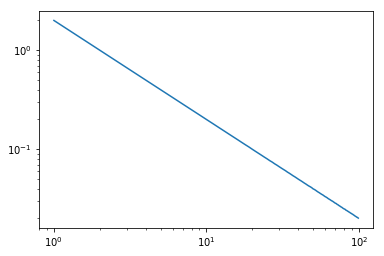

In [87]:
plt.loglog(np.arange(1,100),mMAF_unf)
plt.show()

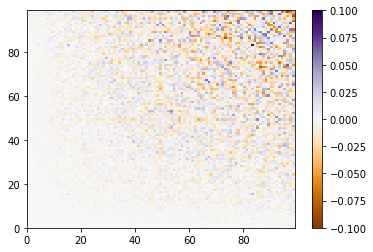

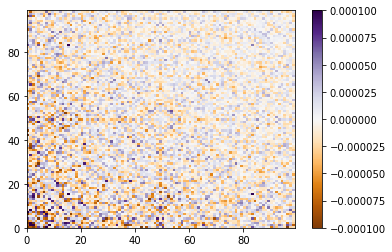

-3.52222710231e-07


In [123]:
plt.pcolor(PMI_unf, vmin=-0.1, vmax=0.1, cmap='PuOr')
plt.colorbar()
plt.show()
plt.pcolor(wPMI_unf, vmin=-0.0001, vmax=0.0001, cmap='PuOr')
plt.colorbar()
plt.show()
print(np.mean(wPMI_unf))

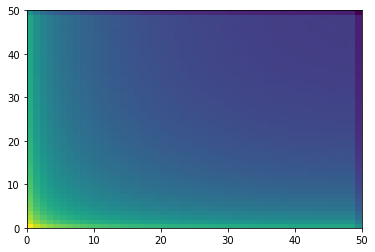

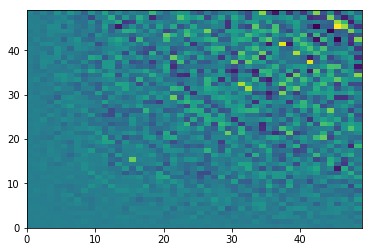

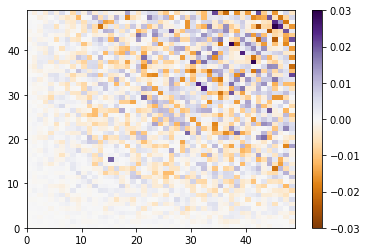

In [137]:
plt.pcolor(np.log(jMAF_large))
plt.show()
plt.pcolor(jMAF_large[:-1,:-1]/(mMAF_large[None,:-1]*mMAF_large[:-1,None]))
plt.show()
plt.pcolor(np.log2(jMAF_large[:-1,:-1]/(mMAF_large[None,:-1]*mMAF_large[:-1,None])),
          vmin=-0.03, vmax=0.03, cmap='PuOr')
plt.colorbar()
plt.show()

## True marginal SFS

In [9]:
mMAF_true = 2*(1.0/x_fold + 1.0/(1-x_fold))/100
mMAF_true[-1] /= 2
jMAF_true = mMAF_true[None,:]*mMAF_true[:,None]
noise = np.random.normal(0,1,50*50).reshape((50,50))
jMAF_true += (noise*np.sqrt(jMAF_true))/100

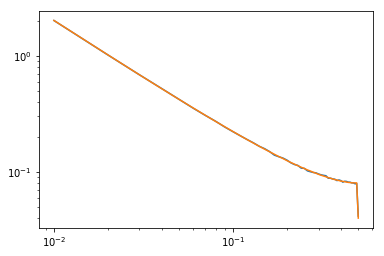

In [341]:
plt.loglog(x_fold, mMAF_unlinked)
plt.loglog(x_fold, mMAF_large)
plt.show()

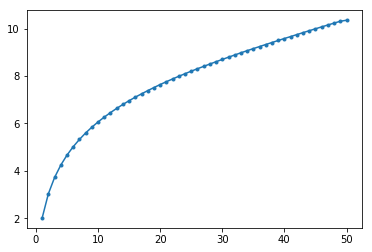

In [342]:
plt.plot(x_fold*n_samples, np.cumsum(mMAF_unlinked), '.-')
plt.show()

In [219]:
cumMAF = np.cumsum(mMAF_unlinked)
totalMAF = cumMAF[-1]
print(totalMAF)

10.3523799519


In [220]:
nbins = 4
bin_edges = np.linspace(cumMAF[0],totalMAF,nbins+1)
print(bin_edges)

[  2.02   4.1    6.19   8.27  10.35]


In [221]:
jMAF_masked = np.copy(jMAF_unlinked)
#np.fill_diagonal(jMAF_masked, 0)
print(jMAF_masked[:4,:4])

[[ 4.07  2.06  1.39  1.05]
 [ 2.06  1.04  0.7   0.53]
 [ 1.39  0.7   0.47  0.36]
 [ 1.05  0.53  0.36  0.27]]


In [222]:
in_bin = np.zeros((nbins, len(mMAF_unlinked)), dtype=int)
for i in range(nbins):
    in_bin[i,:] = np.logical_and(cumMAF >= bin_edges[i], cumMAF <= bin_edges[i+1])
print(in_bin)
print(np.sum(in_bin, axis=1))
print(np.sum(in_bin, axis=0))

[[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1]]
[ 3  7 15 25]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [223]:
np.set_printoptions(precision=2)
mMAF_binned = np.dot(in_bin, mMAF_unlinked)
print(mMAF_binned.shape)
print(mMAF_binned)
jMAF_binned = np.dot(np.dot(in_bin, jMAF_masked), in_bin.T)
print(jMAF_binned.shape)
print(jMAF_binned)

(4,)
[ 3.72  2.34  2.14  2.15]
(4, 4)
[[ 13.87   8.71   7.95   7.95]
 [  8.71   5.46   4.96   4.91]
 [  7.95   4.96   4.44   4.29]
 [  7.95   4.91   4.29   3.95]]


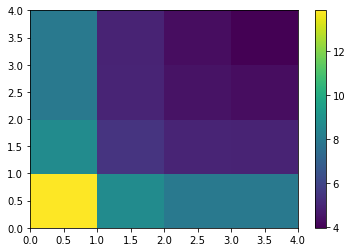

In [224]:
plt.pcolor(jMAF_binned)
plt.colorbar()
plt.show()

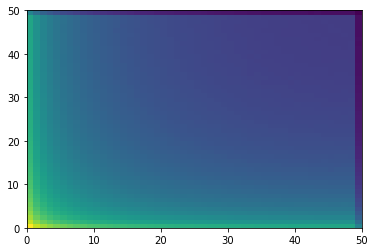

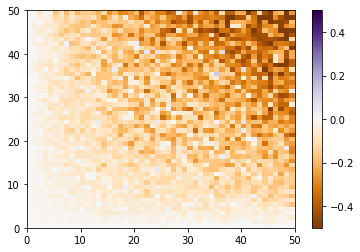

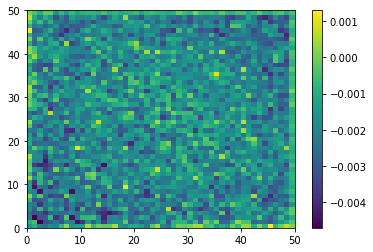

In [121]:
#ratio = jMAF_binned / (mMAF_binned[:,None]*mMAF_binned[None,:])
#cov_binned = jMAF_binned - (mMAF_binned[:,None]*mMAF_binned[None,:])
#PMI = np.log2(ratio)
#wPMI = jMAF_binned * PMI
#plt.pcolor(jMAF_unlinked)
#plt.show()
#plt.pcolor(ratio_unlinked)
#plt.colorbar()
#plt.show()

plt.pcolor(np.log(jMAF_large))
plt.show()

#plt.pcolor(PMI_unlinked, vmin=-.5, vmax=.5, cmap='PuOr')
#plt.colorbar()
#plt.show()
plt.pcolor(PMI_large, vmin=-.5, vmax=.5, cmap='PuOr')
plt.colorbar()
plt.show()

#plt.pcolor(wPMI_unlinked)
#plt.colorbar()
#plt.show()
plt.pcolor(wPMI_large)
plt.colorbar()
plt.show()

#plt.pcolor(ratio)
#plt.colorbar()
#plt.show()
#plt.pcolor(PMI)
#plt.colorbar()
#plt.show()
#plt.pcolor(wPMI)
#plt.colorbar()
#plt.show()

In [226]:
print(np.nansum(wPMI_unlinked))
print(np.nansum(wPMI))

-2.60934833702
-2.64915381376


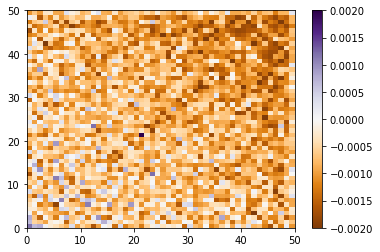

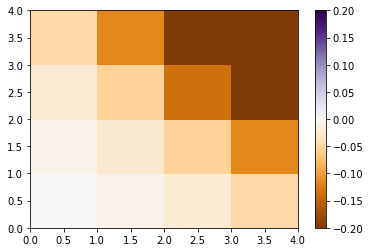

In [236]:
plt.pcolor(cov_unlinked, vmin=-0.002, vmax=0.002, cmap='PuOr')
plt.colorbar()
plt.show()

plt.pcolor(cov_binned, vmin=-0.2, vmax=0.2, cmap='PuOr')
plt.colorbar()
plt.show()

In [11]:
cross_ratio = jMAF_large / (mMAF_true[:,None]*mMAF_true[None,:])
print(cross_ratio)

[[ 0.99990754  0.99984608  0.99922349 ...,  0.99724406  0.99807199
   0.99188395]
 [ 0.99984608  0.99993306  0.99930581 ...,  0.99264623  0.99131015
   0.98846462]
 [ 0.99922349  0.99930581  0.99798332 ...,  0.98612311  0.98802112
   0.98371509]
 ..., 
 [ 0.99724406  0.99264623  0.98612311 ...,  0.76994841  0.77208378
   0.76310029]
 [ 0.99807199  0.99131015  0.98802112 ...,  0.77208378  0.76139926
   0.75993762]
 [ 0.99188395  0.98846462  0.98371509 ...,  0.76310029  0.75993762
   0.99938322]]


In [12]:
print(np.sum(jMAF_large,axis=1)/np.sum(mMAF_true))
print(np.sum(jMAF_large)/np.sum(mMAF_true)**2)

[ 2.01751599  1.01778057  0.6842671   0.51793353  0.41826784  0.35183104
  0.3044116   0.26892107  0.24143539  0.21928563  0.20134765  0.18635455
  0.17381357  0.16299525  0.15374884  0.14573312  0.13853741  0.13217623
  0.12687447  0.12155985  0.11701417  0.11305045  0.10944272  0.10600118
  0.10314347  0.10016237  0.09798475  0.09539866  0.09355846  0.09137753
  0.08962291  0.08811039  0.08666734  0.08504306  0.08391186  0.08262948
  0.08141885  0.0806647   0.07977338  0.07880711  0.07813648  0.07761068
  0.07690661  0.076333    0.07600812  0.07542677  0.07521259  0.07516289
  0.07499462  0.03725615]
0.982314062719


## Correct for pi

In [24]:
pi_true = 0.01
mSFS_full = np.zeros(51)
mSFS_full[0] = 1 - pi_true*np.sum(mMAF_true)
mSFS_full[1:] = pi_true*mMAF_true
print(mSFS_full)
print(np.sum(mSFS_full))

jSFS_full = np.zeros((51,51))
jSFS_full[1:,1:] = pi_true**2 * jMAF_large
jSFS_full[0,1:] = mSFS_full[1:] - np.sum(jSFS_full[1:,1:],axis=0)
jSFS_full[1:,0] = mSFS_full[1:] - np.sum(jSFS_full[1:,1:],axis=1)
jSFS_full[0,0] = mSFS_full[0] - np.sum(jSFS_full[0,1:])

print(np.sum(jSFS_full, axis=1))

[  8.96452450e-01   2.02020202e-02   1.02040816e-02   6.87285223e-03
   5.20833333e-03   4.21052632e-03   3.54609929e-03   3.07219662e-03
   2.71739130e-03   2.44200244e-03   2.22222222e-03   2.04290092e-03
   1.89393939e-03   1.76834660e-03   1.66112957e-03   1.56862745e-03
   1.48809524e-03   1.41743444e-03   1.35501355e-03   1.29954516e-03
   1.25000000e-03   1.20554551e-03   1.16550117e-03   1.12930548e-03
   1.09649123e-03   1.06666667e-03   1.03950104e-03   1.01471334e-03
   9.92063492e-04   9.71345313e-04   9.52380952e-04   9.35016363e-04
   9.19117647e-04   9.04568069e-04   8.91265597e-04   8.79120879e-04
   8.68055556e-04   8.58000858e-04   8.48896435e-04   8.40689365e-04
   8.33333333e-04   8.26787929e-04   8.21018062e-04   8.15993472e-04
   8.11688312e-04   8.08080808e-04   8.05152979e-04   8.02890405e-04
   8.01282051e-04   8.00320128e-04   4.00000000e-04]
1.0
[  8.96452450e-01   2.02020202e-02   1.02040816e-02   6.87285223e-03
   5.20833333e-03   4.21052632e-03   3.5460992

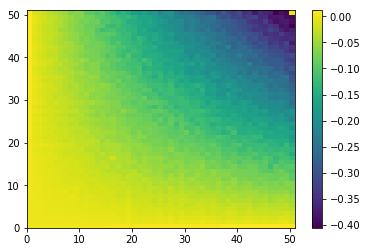

In [30]:
plt.pcolor(np.log2(jSFS_full/(mSFS_full[:,None]*mSFS_full[None,:])))
plt.colorbar()
plt.show()

## Multinomial sampling

In [292]:
np.set_printoptions(precision=4)
p = mMAF_unlinked / np.sum(mMAF_unlinked)
n_reps = 500000
mMAF_sample = np.zeros_like(mMAF_unlinked)
jMAF_sample = np.zeros_like(jMAF_unlinked)
for i_rep in range(n_reps):
    s1 = np.random.multinomial(1,p)
    s2 = np.random.multinomial(1,p)
    mMAF_sample += (s1 + s2)/2.0
    jMAF_sample += s1[:,None]*s2[None,:]
mMAF_sample /= n_reps
mMAF_sample *= np.sum(mMAF_unlinked)
jMAF_sample += jMAF_sample.T
jMAF_sample /= 2*n_reps
jMAF_sample *= np.sum(mMAF_unlinked)**2

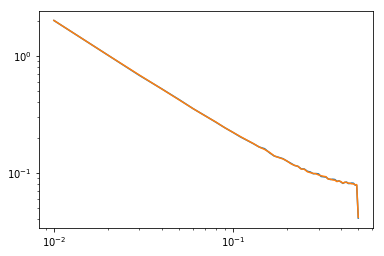

In [293]:
plt.loglog(x_fold, mMAF_sample)
plt.loglog(x_fold, mMAF_unlinked)
plt.show()

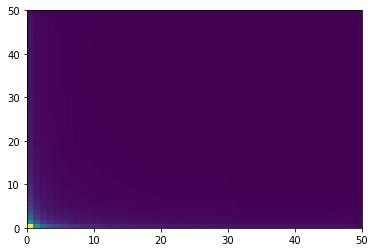

In [294]:
plt.pcolor(jMAF_sample)
plt.show()

In [295]:
ratio_sample = jMAF_sample / (mMAF_sample[:,None]*mMAF_sample[None,:])
PMI_sample = np.log2(ratio_sample)
wPMI_sample = jMAF_sample*PMI_sample

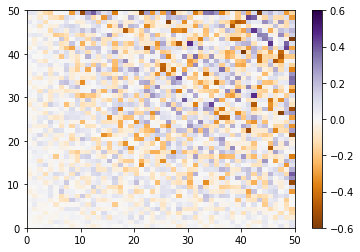

In [299]:
plt.pcolor(PMI_sample, vmin=-0.6, vmax=0.6, cmap='PuOr')
plt.colorbar()
plt.show()

# Perfect knowledge

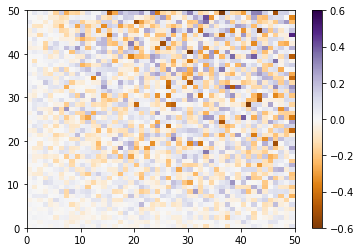

In [10]:
plt.pcolor(np.log2(jMAF_true/(mMAF_true[None,:]*mMAF_true[:,None])), vmin=-0.6,vmax=0.6,cmap='PuOr')
plt.colorbar()
plt.show()

# OLD

In [30]:
print(pi_unlinked)
print(pi_bsc_unlinked)

1.98075910949
1.97844534552


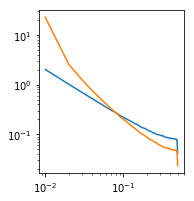

In [31]:
plt.loglog(x_fold, mMAF_unlinked)
plt.loglog(x_fold, mMAF_bsc_unlinked)
plt.show()

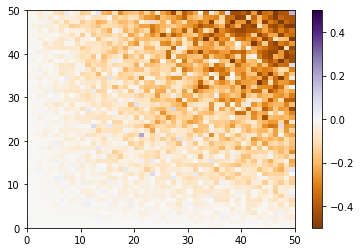

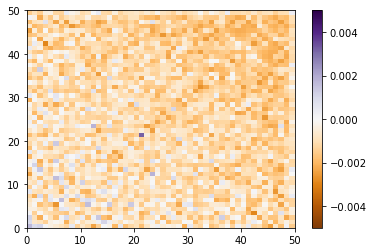

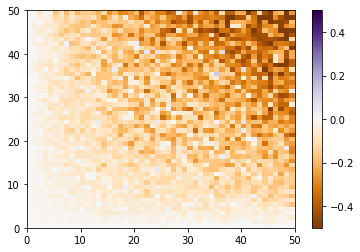

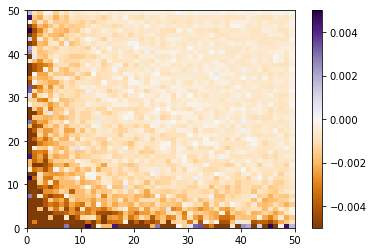

In [278]:
plt.pcolormesh(PMI_unlinked, vmin=-0.5, vmax=0.5, cmap='PuOr')
plt.colorbar()
plt.show()
plt.pcolormesh(wPMI_unlinked, vmin=-0.005, vmax=0.005, cmap='PuOr')
plt.colorbar()
plt.show()


plt.pcolormesh(PMI_bsc_unlinked, vmin=-0.5, vmax=0.5, cmap='PuOr')
plt.colorbar()
plt.show()
plt.pcolormesh(wPMI_bsc_unlinked, vmin=-0.005, vmax=0.005, cmap='PuOr')
plt.colorbar()
plt.show()

In [32]:
res = 10
pad = (res - (mMAF_unlinked.size % res)) % res

m_padded = np.pad(mMAF_unlinked, (0,pad), 'constant')
mMAF_coarse = m_padded.reshape(m_padded.size//res, res).sum(axis=1)

j_padded = np.pad(jMAF_unlinked, ((0,pad), (0,pad)), 'constant')
jMAF_coarse = j_padded.reshape(j_padded.shape[1]//res, res, j_padded.shape[1]//res, res).sum(axis=(1,3))

ratio_coarse = jMAF_coarse / (mMAF_coarse[None,:]*mMAF_coarse[:,None])
PMI_coarse = np.log2(ratio_coarse)

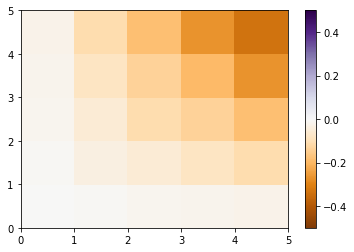

In [33]:
plt.pcolormesh(PMI_coarse, vmin=-0.5, vmax=0.5, cmap='PuOr')
plt.colorbar()
plt.show()

In [1]:
for i, r in enumerate(r_list):
    print(r)
    fig = plt.figure(figsize=(12,3))
    ax = plt.subplot(1,4,1)
    plt.pcolor(PMI_kingman[i,:,:] - PMI_unlinked, vmin=-0.5, vmax=0.5, cmap='PuOr')
    print(np.nanmean(PMI_kingman[i,:,:] - PMI_unlinked))
    #ax = plt.subplot(1,4,2)
    #ax.pcolor(PMI_mmc[i,:,:], vmin=-0.5, vmax=0.5, cmap='PuOr')
    
    #ax = plt.subplot(1,4,3)
    #plt.pcolor(PMI_bsc[i,:,:], vmin=-0.5, vmax=0.5, cmap='PuOr')
    
    #ax = plt.subplot(1,4,4)
    #plt.pcolor(PMI_step[i,:,:], vmin=-0.5, vmax=0.5, cmap='PuOr')


    #plt.colorbar()

    #plt.colorbar()
    plt.show()

NameError: name 'r_list' is not defined

# TEST ON TRULY INDEPENDENT DATA

In [75]:
n_samples = 1000000
n = 50
#p = .5
p = 1.0/np.arange(1,n+1)
p /= np.sum(p)
mPMF = np.zeros(n)
jPMF = np.zeros((n,n))
for i in range(n_samples):
    sample = np.random.multinomial(1,p,2)
    #print(sample)
    mPMF += sample[0,:] + sample[1,:]
    jPMF += sample[0,:][:,None]*sample[1,:][None,:]
mPMF /= np.sum(mPMF)
jPMF += jPMF.T
jPMF /= np.sum(jPMF)
print(np.sum(mPMF))
print(np.sum(jPMF))

1.0
1.0


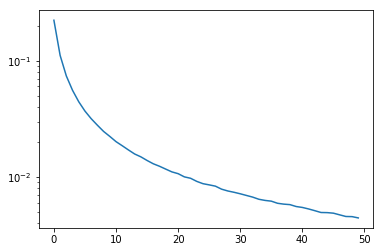

In [76]:
plt.semilogy(mPMF)
plt.show()

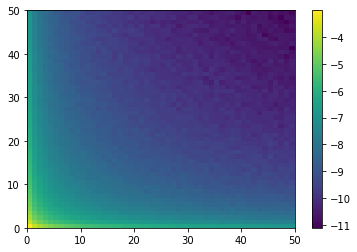

In [78]:
plt.pcolor(np.log(jPMF))
plt.colorbar()
plt.show()

In [79]:
ratio = jPMF / (mPMF[:,None]*mPMF[None,:])
PMI = np.log2(ratio)
PMI[np.isinf(PMI)] = np.nan
wPMI = jPMF * PMI

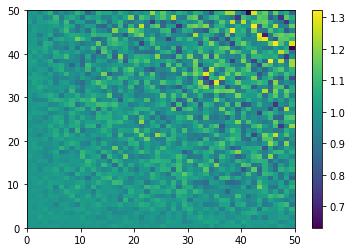

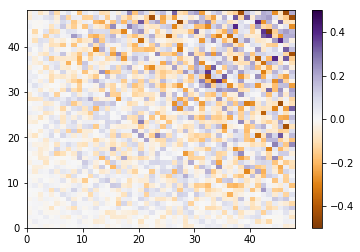

In [82]:
plt.pcolor(ratio)
plt.colorbar()
plt.show()
plt.pcolor(PMI[1:-1,1:-1], vmin=-.5, vmax=.5, cmap='PuOr')
plt.colorbar()
plt.show()

In [113]:
ns=6
A = np.arange(1.0,(ns-1)**2+1).reshape(ns-1,ns-1)**2
print(A)

[[   1.    4.    9.   16.   25.]
 [  36.   49.   64.   81.  100.]
 [ 121.  144.  169.  196.  225.]
 [ 256.  289.  324.  361.  400.]
 [ 441.  484.  529.  576.  625.]]


In [115]:
B = (A + A[:,::-1] + A[::-1,:])[:ns//2,:ns//2]
print(B)

[[ 467.  504.  547.]
 [ 392.  419.  452.]
 [ 467.  484.  507.]]
